# 1. Loading and Reading Dataset:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\DataWarehouse and DataMining\DataMining\BaoCaoNhom\Retail Data Set\file_out2.csv")

In [3]:
df.head()

,Unnamed: 0,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity
0,0,328,2019-12-27,1684,796.610169,143.389831,185,4
1,1,329,2019-12-27,524,355.932203,64.067797,185,2
2,2,330,2019-12-27,192,901.694915,162.305085,230,4
3,3,330,2019-12-27,218,182.754237,32.895763,230,1
4,4,330,2019-12-27,247,780.101695,140.418305,230,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29103 entries, 0 to 29102
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  29103 non-null  int64  
 1   InvoiceID   29103 non-null  int64  
 2   Date        29103 non-null  object 
 3   ProductID   29103 non-null  int64  
 4   TotalSales  29103 non-null  float64
 5   Discount    29103 non-null  float64
 6   CustomerID  29103 non-null  int64  
 7   Quantity    29103 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.8+ MB


In [5]:
df.shape

(29103, 8)

## - Data Cleaning

In [6]:
df = df.drop(columns='Unnamed: 0')

In [7]:
df.duplicated().sum()

np.int64(293)

In [8]:
df[df.duplicated(keep=False)].sort_values(by=['CustomerID','InvoiceID'] ).head(10)

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity
13040,297,2020-01-28,1797,1503.36,0.000000,122,4
13299,297,2020-01-28,1797,1503.36,0.000000,122,4
12138,3,2020-07-27,1797,1559.70,0.000000,230,2
12142,3,2020-07-27,1797,1559.70,0.000000,230,2
12139,22,2020-08-19,1459,906.59,0.000883,230,2
12140,22,2020-08-19,300,758.84,0.000000,230,4
12141,22,2020-08-19,555,909.61,-0.002517,230,2
12143,22,2020-08-19,1459,906.59,0.000883,230,2
12144,22,2020-08-19,300,758.84,0.000000,230,4
12145,22,2020-08-19,555,909.61,-0.002517,230,2


In [9]:
# dropping redundancy
df.drop_duplicates(keep= 'first', inplace= True)

In [11]:
# chceking for null values
df.isnull().sum()

InvoiceID     0
Date          0
ProductID     0
TotalSales    0
Discount      0
CustomerID    0
Quantity      0
dtype: int64

## - Xử lý giá trị đơn hàng bằng 0

In [12]:
# checking whether TotalSales and Quantity having zeros in it
(df[['TotalSales', 'Quantity']] == 0).sum()

TotalSales    176
Quantity      158
dtype: int64

In [13]:
# getting TotalSales and Quantity having zeros
df[(df.TotalSales == 0) & (df.Quantity == 0)]

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity
2328,1930,2019-10-05,885,0.0,0.0,17,0
6533,4718,2019-04-13,751,0.0,0.0,404,0
8706,289,2019-03-23,1830,0.0,0.0,430,0
8707,291,2019-10-21,224,0.0,0.0,276,0
8708,262,2019-11-18,925,0.0,0.0,364,0
...,...,...,...,...,...,...,...
28893,196,2023-02-15,900,0.0,0.0,230,0
28894,197,2023-02-16,795,0.0,0.0,230,0
28895,198,2023-02-18,628,0.0,0.0,230,0
28896,198,2023-02-18,900,0.0,0.0,230,0


In [14]:
# getting only TotalSales having zeros
df[(df.TotalSales == 0) & (df.Quantity != 0)]

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity
8663,242,2019-01-15,1790,0.0,0.0,122,4
8665,244,2019-02-15,1470,0.0,0.0,129,4
8667,246,2019-02-28,1499,0.0,0.0,129,4
8673,253,2019-04-29,1592,0.0,0.0,117,4
8685,242,2019-02-11,1790,0.0,0.0,122,4
8687,244,2019-02-19,1470,0.0,0.0,129,4
8688,245,2019-03-11,1246,0.0,0.0,122,4
8689,246,2019-03-07,1499,0.0,0.0,129,4
8696,253,2019-05-02,1592,0.0,0.0,117,4
8697,254,2019-05-04,1826,0.0,0.0,122,4


In [25]:
df['ProductID'].nunique()

1940

In [26]:
# getting unique ProductID
unique_product_id = df['ProductID'].unique()
unique_product_id

array([1684,  524,  192, ..., 1201, 1261,  371])

In [27]:
# calculating each products average unit price and its mode quantity

list_unit_price = [] # empty list to store avg unit price
list_qty = [] # empty list to store mode qty

for i in unique_product_id:
    temp_df = df[df.ProductID == i] # temp dataframe to store each product data
    
    temp_unit_price = temp_df['TotalSales'].sum() / temp_df['Quantity'].sum() # calculating avg unit price of particular product
    list_unit_price.append(temp_unit_price) # appending to list_unit_price
    
    temp_qty = round(temp_df['Quantity'].mode().iloc[0]) # calculating mode quantity of the particular product
    list_qty.append(temp_qty) # appending to list_qty

In [28]:
# creating a dataframe that have ProductID with its Avg_Unit_Price and Mode_Quantity

product_dict = {'ProductID' : unique_product_id, 'Avg_Unit_Price' : list_unit_price, 'Mode_Quantity' : list_qty} # columns

product_df = pd.DataFrame(data = product_dict) # creating dataframe
product_df.head()

,ProductID,Avg_Unit_Price,Mode_Quantity
0,1684,198.349619,4
1,524,209.738909,4
2,192,301.046441,4
3,218,225.840083,4
4,247,234.053428,4


In [29]:
# creating a temp dataframe that have TotalSales zero from orginal dataset
df_temp = df[df['TotalSales'] == 0]
df_temp.head()

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity
2328,1930,2019-10-05,885,0.0,0.0,17,0
6533,4718,2019-04-13,751,0.0,0.0,404,0
8663,242,2019-01-15,1790,0.0,0.0,122,4
8665,244,2019-02-15,1470,0.0,0.0,129,4
8667,246,2019-02-28,1499,0.0,0.0,129,4


In [30]:
# replacing the zeros of TotalSales with Avg_Unit_Price and zeros of Quantity with Mode_Quantity of the particular product

k = 0
for i in product_df['ProductID']: # getting ProductID from product_df

    for j in df_temp.index: # getting index number from df_temp

        if df_temp['ProductID'][j] == i and df_temp['Quantity'][j] == 0: # validating condition
            
            df_temp['Quantity'][j] = product_df['Mode_Quantity'][k] # updating quantity
            df_temp['TotalSales'][j] = product_df['Avg_Unit_Price'][k] * product_df['Mode_Quantity'][k] # updating totalsales
            
        elif df_temp['ProductID'][j] == i and df_temp['Quantity'][j] != 0: # validating condition
            
            df_temp['TotalSales'][j] = product_df['Avg_Unit_Price'][k] * df_temp['Quantity'][j] # updating totalsales
            
        else:
            pass
            
    k+=1

C:\Users\acer\AppData\Local\Temp\ipykernel_20148\3200233825.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_temp['Quantity'][j] = product_df['Mode_Quantity'][k] # updating quantity
C:\Users\acer\AppData\Local\Temp\ipykernel_20148\320

In [31]:
# viewing the updated temp dataframe
df_temp.tail()

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity
28893,196,2023-02-15,900,3933.123257,0.0,230,4
28894,197,2023-02-16,795,2081.267598,0.0,230,2
28895,198,2023-02-18,628,2832.718468,0.0,230,4
28896,198,2023-02-18,900,3933.123257,0.0,230,4
28897,198,2023-02-18,1285,3225.687382,0.0,230,2


In [32]:
# updating the records of orginal dataset with temp dataset
df.update(df_temp)
df.head()

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity
0,328,2019-12-27,1684,796.610169,143.389831,185,4
1,329,2019-12-27,524,355.932203,64.067797,185,2
2,330,2019-12-27,192,901.694915,162.305085,230,4
3,330,2019-12-27,218,182.754237,32.895763,230,1
4,330,2019-12-27,247,780.101695,140.418305,230,4


In [34]:
# checking again after updating whether TotalSales and Quantity having any zeros in it
(df[['TotalSales', 'Quantity']] == 0).sum()

TotalSales    16
Quantity      16
dtype: int64

In [35]:
# dropping the records that still have TotalSales and Quantity zero

drop_list = list(df[df['TotalSales'] == 0].index) # getting the index of those records 
df.drop(drop_list, inplace= True) # dropping

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28810 entries, 0 to 29102
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   InvoiceID   28810 non-null  int64  
 1   Date        28810 non-null  object 
 2   ProductID   28810 non-null  int64  
 3   TotalSales  28810 non-null  float64
 4   Discount    28810 non-null  float64
 5   CustomerID  28810 non-null  int64  
 6   Quantity    28810 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 1.8+ MB


In [37]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [39]:
df.head()

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity
0,328,2019-12-27,1684,796.610169,143.389831,185,4
1,329,2019-12-27,524,355.932203,64.067797,185,2
2,330,2019-12-27,192,901.694915,162.305085,230,4
3,330,2019-12-27,218,182.754237,32.895763,230,1
4,330,2019-12-27,247,780.101695,140.418305,230,4


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28794 entries, 0 to 29102
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   InvoiceID   28794 non-null  int64         
 1   Date        28794 non-null  datetime64[ns]
 2   ProductID   28794 non-null  int64         
 3   TotalSales  28794 non-null  float64       
 4   Discount    28794 non-null  float64       
 5   CustomerID  28794 non-null  int64         
 6   Quantity    28794 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 1.8 MB


# 2. Tính R,F,M

In [42]:
import pandas as pd
import datetime

# 1. Calculate Recency (R)
# Get the maximum transaction date and add one day
current_date = max(df['Date']) + datetime.timedelta(days=1)

# 2. Calculate Total_Price
df['TotalPrice'] = df['TotalSales'] + df['Discount']



# 3. Group by CustomerID to calculate R, F, M
rfm_df = df.groupby(['CustomerID']).agg(
    Recency=('Date', lambda x: (current_date - x.max()).days),  # Recency
    Frequency=('InvoiceID', lambda x: x.nunique()),  # Frequency
    Monetary=('TotalPrice', lambda x: x.sum())  # Monetary
).reset_index()

# Display the RFM DataFrame
print(rfm_df.head())

   CustomerID  Recency  Frequency       Monetary
0           0        8         36  350758.817383
1           1      736         13   24162.540000
2           2       53         22   61317.180000
3           3      626          1     355.000000
4           4       93         35   71953.710000


In [57]:
current_date

Timestamp('2023-03-26 00:00:00')

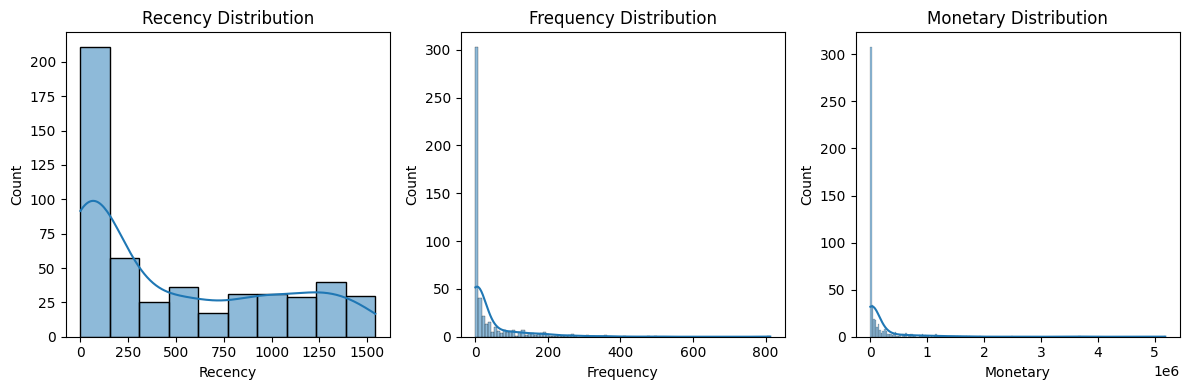

In [43]:
# Ve phan phoi de kiem tra
# Tạo đồ thị
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Sử dụng sns.histplot để thay thế sns.distplot
sns.histplot(rfm_df['Recency'], kde=True, ax=ax[0])
ax[0].set_title('Recency Distribution')

sns.histplot(rfm_df['Frequency'], kde=True, ax=ax[1])
ax[1].set_title('Frequency Distribution')

sns.histplot(rfm_df['Monetary'], kde=True, ax=ax[2])
ax[2].set_title('Monetary Distribution')

plt.tight_layout()
plt.show()

In [44]:
import matplotlib.pyplot as plt

def plot_boxplot(df, ft):
    plt.figure(figsize=(12, 6))

    # Vẽ boxplot nằm ngang
    plt.subplot(1, 2, 1)
    df.boxplot(column=[ft], vert=False)
    plt.title(f'Boxplot of {ft}')
    plt.grid(False)

    # Vẽ histogram
    plt.subplot(1, 2, 2)
    df[ft].hist(bins=30, edgecolor='black')
    plt.title(f'Histogram of {ft}')
    plt.xlabel(ft)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

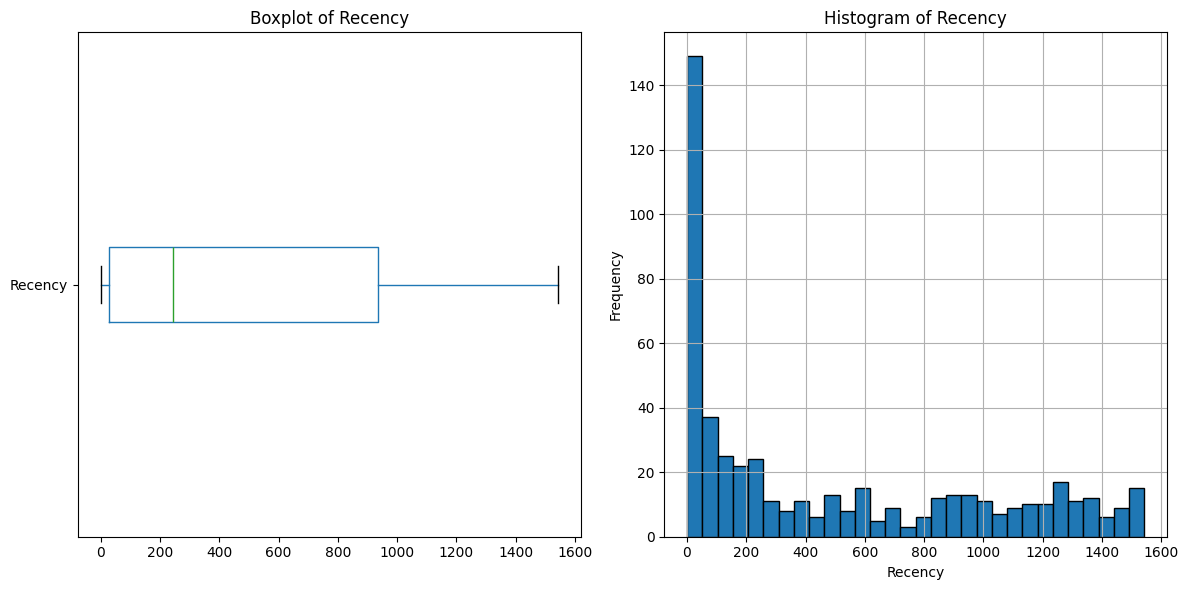

In [45]:
plot_boxplot(rfm_df, 'Recency')

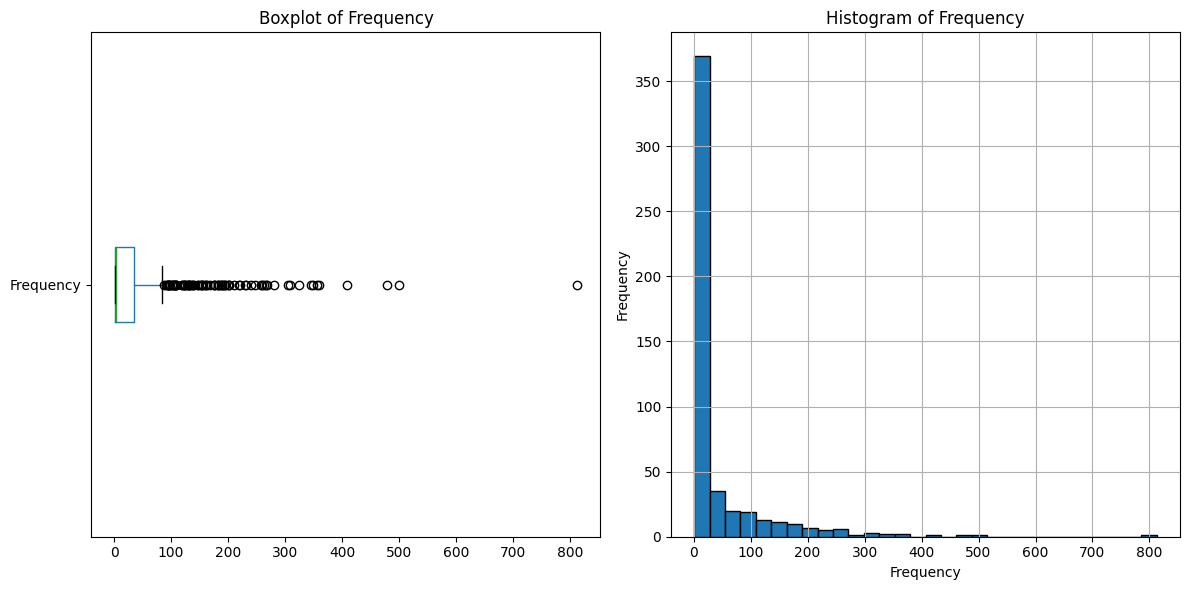

In [46]:
plot_boxplot(rfm_df, 'Frequency')

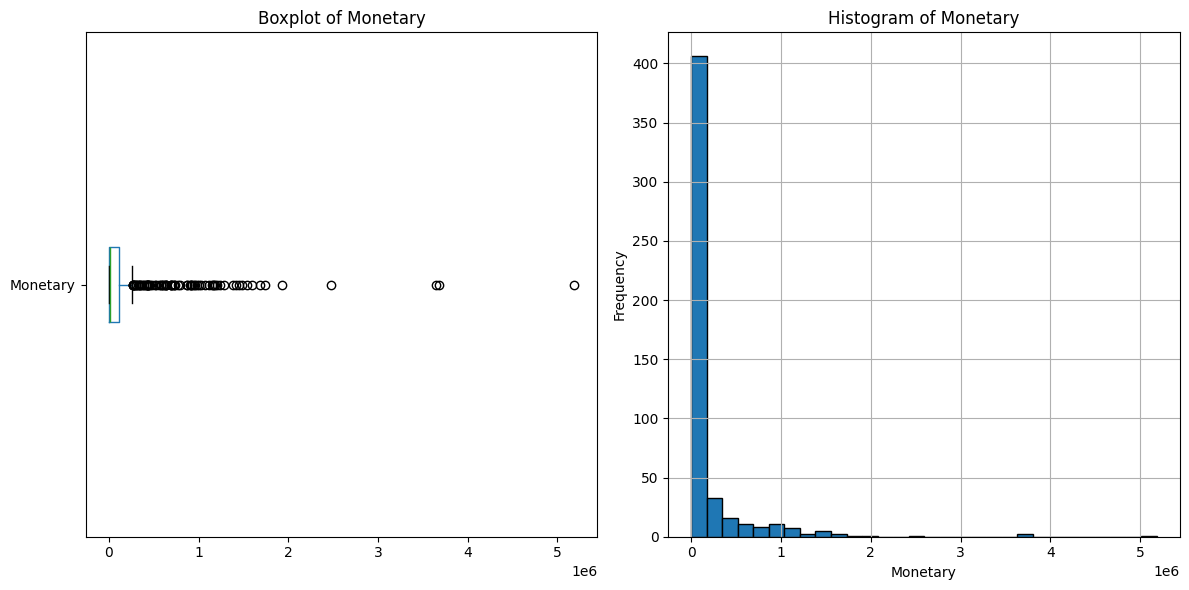

In [47]:
plot_boxplot(rfm_df, 'Monetary')

In [48]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

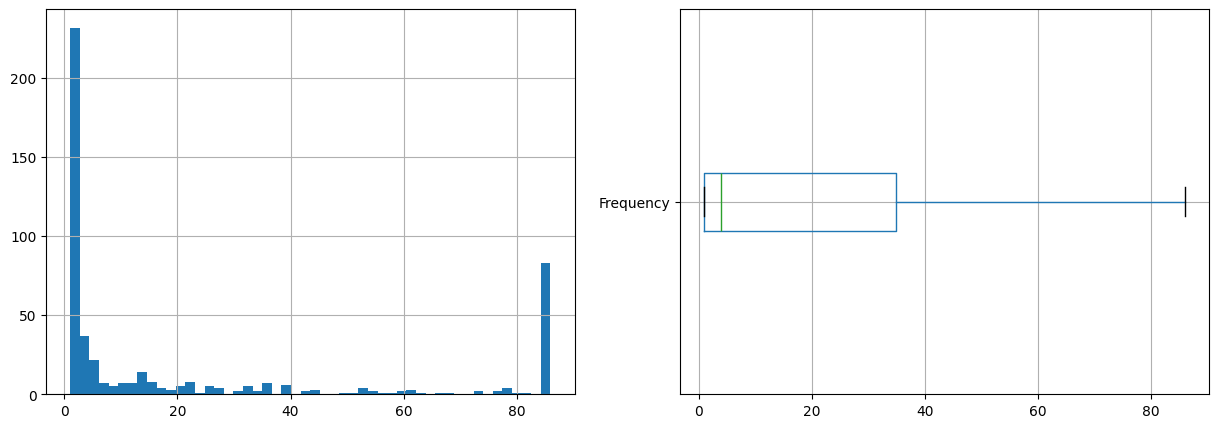

In [49]:
# Áp dụng clipping outliers trực tiếp vào cột "Frequency" trong rfm_df
rfm_df["Frequency"] = BoxplotOutlierClipper().fit_transform(rfm_df["Frequency"])

# Vẽ histogram và boxplot cho cột "Frequency" sau khi xử lý
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
rfm_df["Frequency"].hist(bins=50, ax=axes[0])
rfm_df[["Frequency"]].boxplot(ax=axes[1], vert=False)
plt.show() 

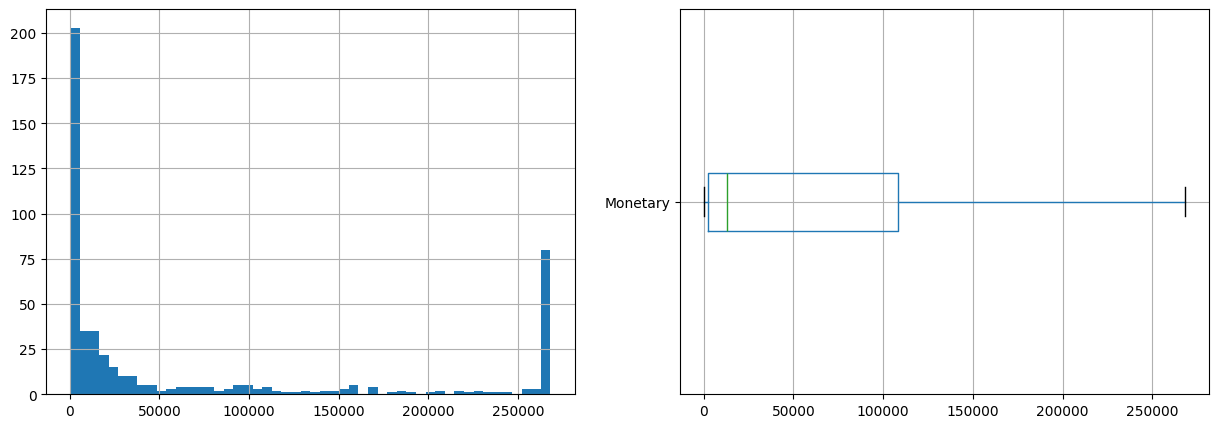

In [50]:
# Áp dụng clipping outliers trực tiếp vào cột "Monetary" trong rfm_df
rfm_df["Monetary"] = BoxplotOutlierClipper().fit_transform(rfm_df["Monetary"])

# Vẽ histogram và boxplot cho cột "Monetary" sau khi xử lý
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
rfm_df["Monetary"].hist(bins=50, ax=axes[0])
rfm_df[["Monetary"]].boxplot(ax=axes[1], vert=False)
plt.show() 

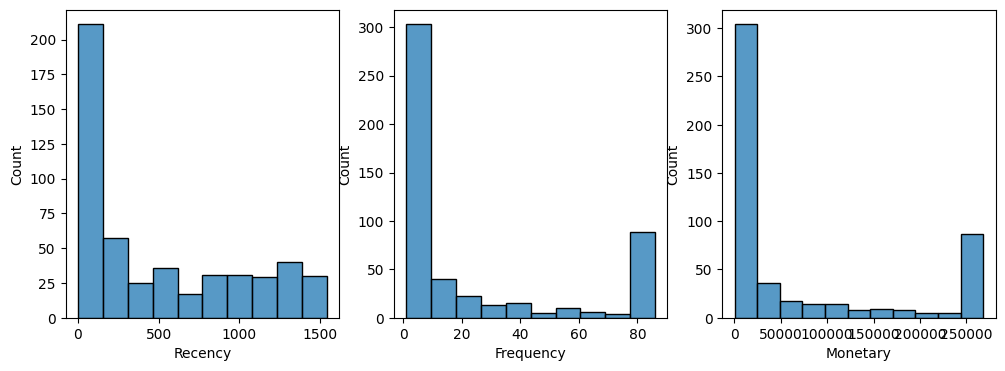

In [51]:
# Vẽ biểu đồ phân phối
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử rfm_df là DataFrame của bạn

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.histplot(rfm_df['Recency'], ax=ax[0])
sns.histplot(rfm_df['Frequency'], ax=ax[1])
sns.histplot(rfm_df['Monetary'], ax=ax[2])

plt.show()

In [52]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_skewness(data, column):
    # Thiết lập biểu đồ 2x2
    fig, ax = plt.subplots(2, 2, figsize=(10, 8))
    
    # Phân phối gốc
    sns.histplot(data[column], kde=True, ax=ax[0, 0])
    ax[0, 0].set_title('Original Distribution')
    
    # Phân phối sau khi log transformation
    sns.histplot(np.log(data[column] + 1), kde=True, ax=ax[0, 1])
    ax[0, 1].set_title('Log Transformation')
    
    # Phân phối sau khi square root transformation
    sns.histplot(np.sqrt(data[column]), kde=True, ax=ax[1, 0])
    ax[1, 0].set_title('Square Root Transformation')
    
    # Phân phối sau khi box-cox transformation
    transformed_data, _ = stats.boxcox(data[column][data[column] > 0])  # Chỉ áp dụng Box-Cox cho các giá trị dương
    sns.histplot(transformed_data, kde=True, ax=ax[1, 1])
    ax[1, 1].set_title('Box-Cox Transformation')
    ax[1, 1].set_xlabel(column)  # Đặt lại tên trục x

    
    plt.tight_layout()
    plt.show()
    
    # Tính độ lệch skewness cho từng phép biến đổi
    print(f"Original Skewness: {data[column].skew().round(2)}")
    print(f"Log Transformation Skewness: {np.log(data[column] + 1).skew().round(2)}")
    print(f"Square Root Transformation Skewness: {np.sqrt(data[column]).skew().round(2)}")
    print(f"Box-Cox Transformation Skewness: {pd.Series(transformed_data).skew().round(2)}")

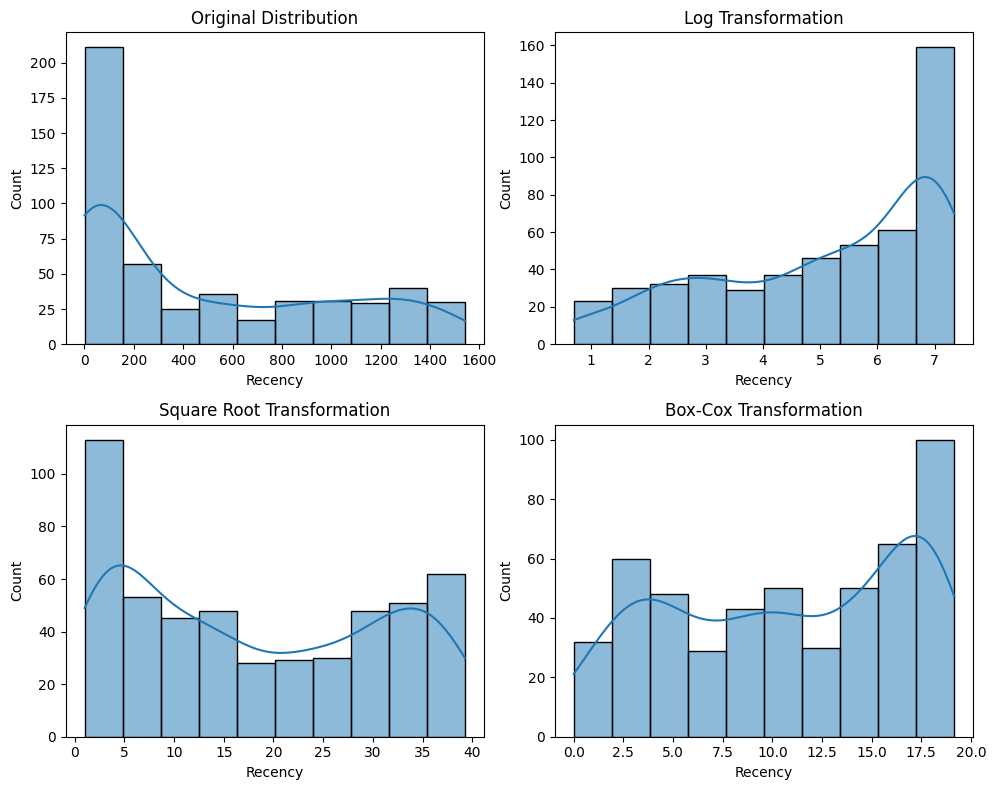

Original Skewness: 0.67
Log Transformation Skewness: -0.64
Square Root Transformation Skewness: 0.19
Box-Cox Transformation Skewness: -0.22


In [53]:
analyze_skewness(rfm_df, 'Recency')

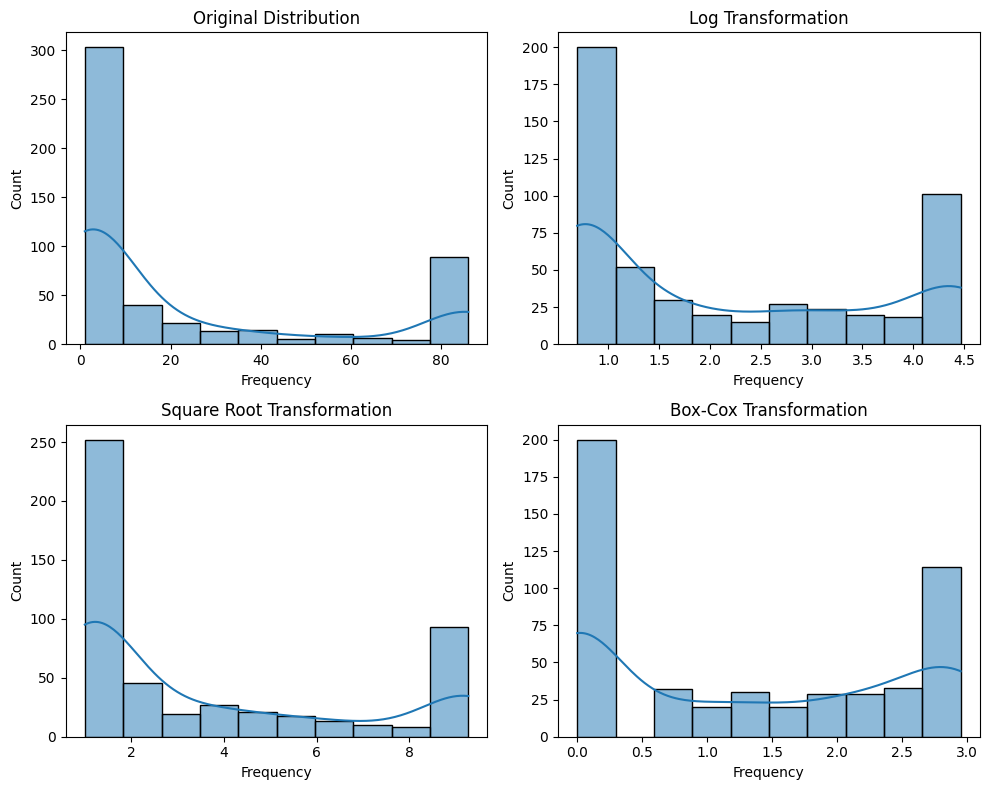

Original Skewness: 1.2
Log Transformation Skewness: 0.51
Square Root Transformation Skewness: 0.87
Box-Cox Transformation Skewness: 0.2


In [54]:
analyze_skewness(rfm_df, 'Frequency')

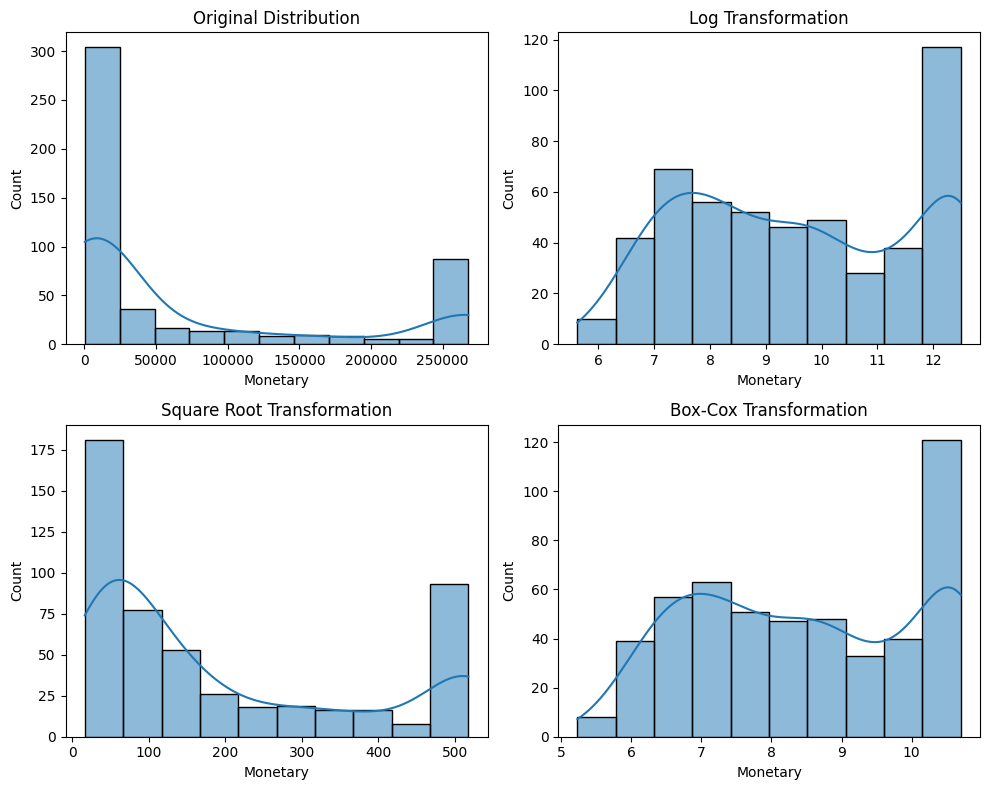

Original Skewness: 1.2
Log Transformation Skewness: 0.08
Square Root Transformation Skewness: 0.84
Box-Cox Transformation Skewness: 0.02


In [55]:
analyze_skewness(rfm_df, 'Monetary')

In [56]:
# Tiến hành transform dữ liệu
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,0,8,36,268021.963585
1,1,736,13,24162.540000
2,2,53,22,61317.180000
3,3,626,1,355.000000
4,4,93,35,71953.710000


In [58]:
rfm_df_t = pd.DataFrame()
rfm_df_t['Recency'] = np.sqrt(rfm_df['Recency'])
rfm_df_t['Frequency'] = stats.boxcox(rfm_df['Frequency'])[0]
rfm_df_t['Monetary'] = stats.boxcox(rfm_df['Monetary'])[0]

In [59]:
rfm_df_t.head()

,Recency,Frequency,Monetary
0,2.828427,2.560397,10.700217
1,27.129320,2.007764,8.896705
2,7.280110,2.307191,9.607865
3,25.019992,0.000000,5.452990
4,9.643651,2.546574,9.728328


# 3. Mô hình

## - K - Means

In [60]:
# Tiến hành scale dữ liệu
from sklearn.preprocessing import StandardScaler

# Tạo một đối tượng StandardScaler
scaler = StandardScaler()

# Fit và transform dữ liệu
rfm_df_t = scaler.fit_transform(rfm_df_t)

# Để xem dữ liệu đã transform dưới dạng DataFrame
pd.DataFrame(rfm_df_t).head()

,0,1,2
0,-1.207335,1.063485,1.392345
1,0.703267,0.605804,0.268654
2,-0.857331,0.853784,0.711747
3,0.537426,-1.056989,-1.876978
4,-0.671503,1.052037,0.786803


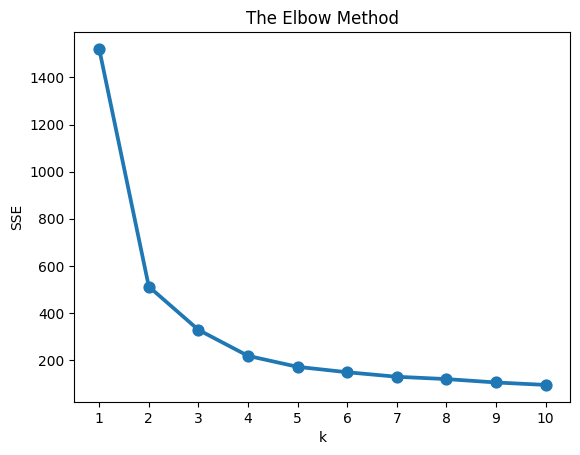

In [61]:
# Đưa dữ liệu vào K means
# Chon so cum bang Elbow
from sklearn.cluster import KMeans

# Khởi tạo dictionary để lưu kết quả
sse = {}

# Thử nghiệm với số cụm từ 1 đến 11
for k in range(1, 11):
    # Khởi tạo mô hình KMeans với k cụm
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit mô hình với dữ liệu đã chuẩn hóa
    kmeans.fit(rfm_df_t)
    # Lưu giá trị inertia (SSE) cho số cụm k
    sse[k] = kmeans.inertia_

# Vẽ đồ thị Elbow
plt.title('The Elbow Method')
plt.xlabel('k')  # Số cụm
plt.ylabel('SSE')  # Sum of Squared Errors
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

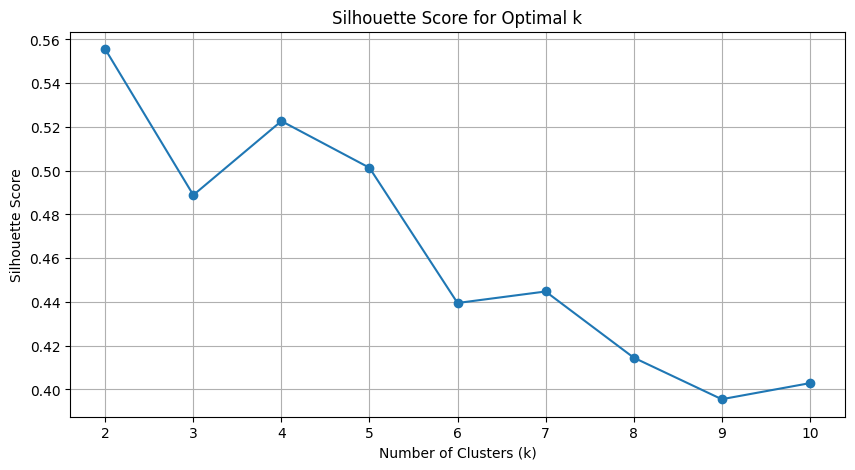

In [62]:
from sklearn.metrics import silhouette_score
range_k = range(2, 11)  # Kiểm tra từ 2 đến 10 cụm
silhouette_scores = []
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm_df_t)
    silhouette_avg = silhouette_score(rfm_df_t, cluster_labels)
    silhouette_scores.append(silhouette_avg)
plt.figure(figsize=(10, 5))
plt.plot(range_k, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range_k)
plt.grid()
plt.show()

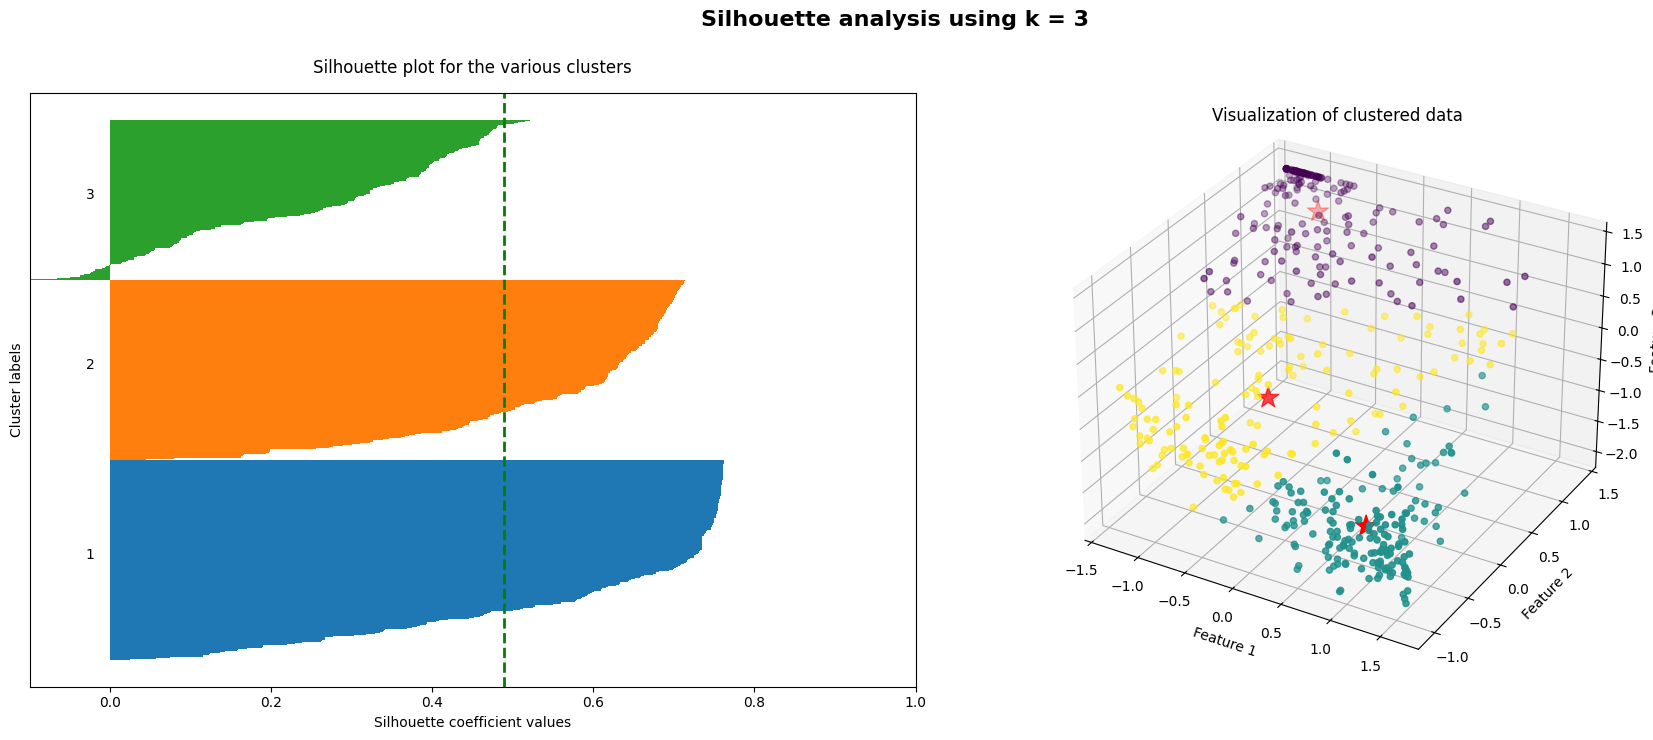

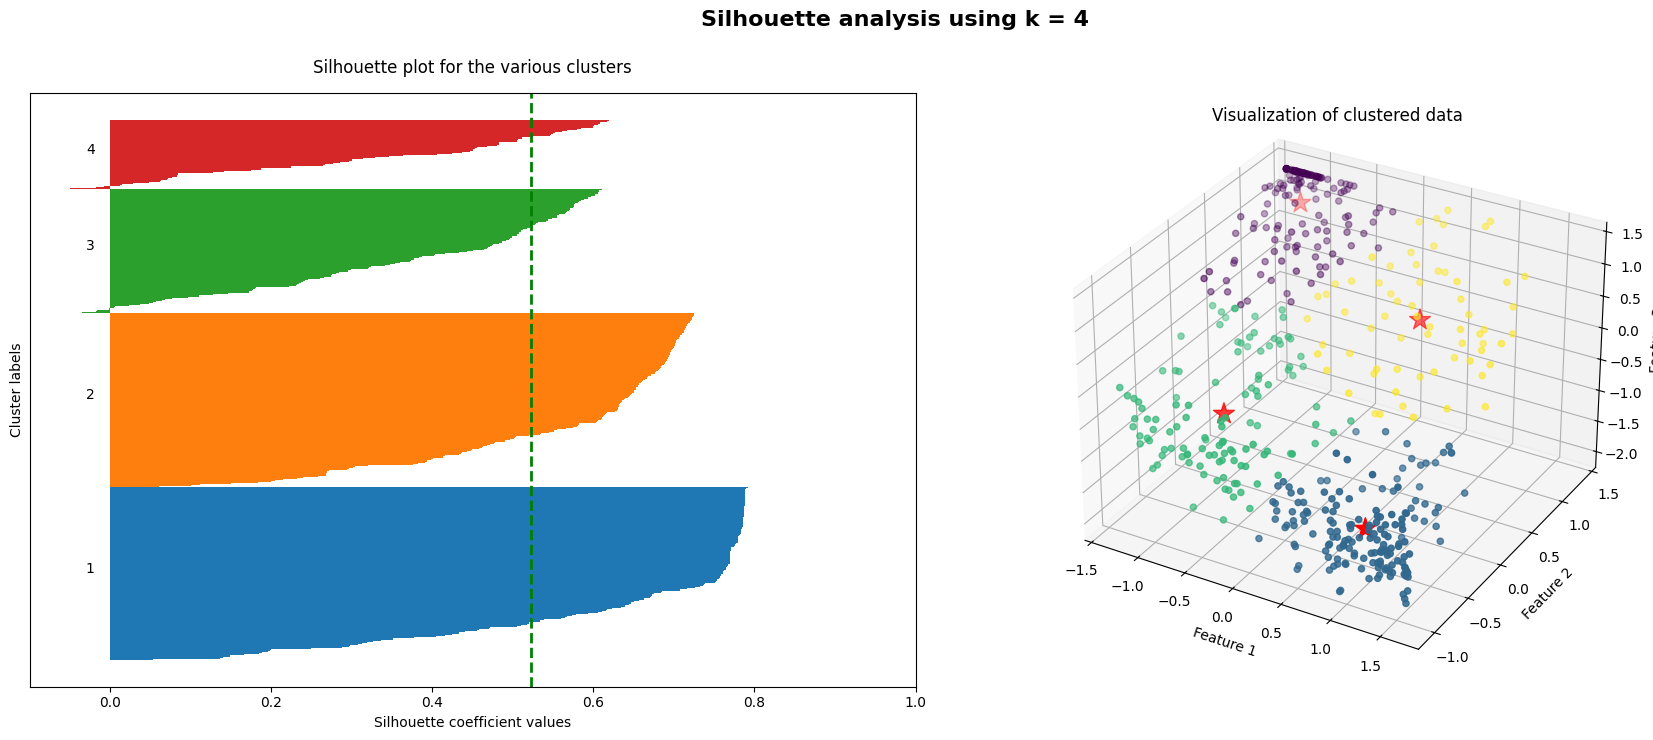

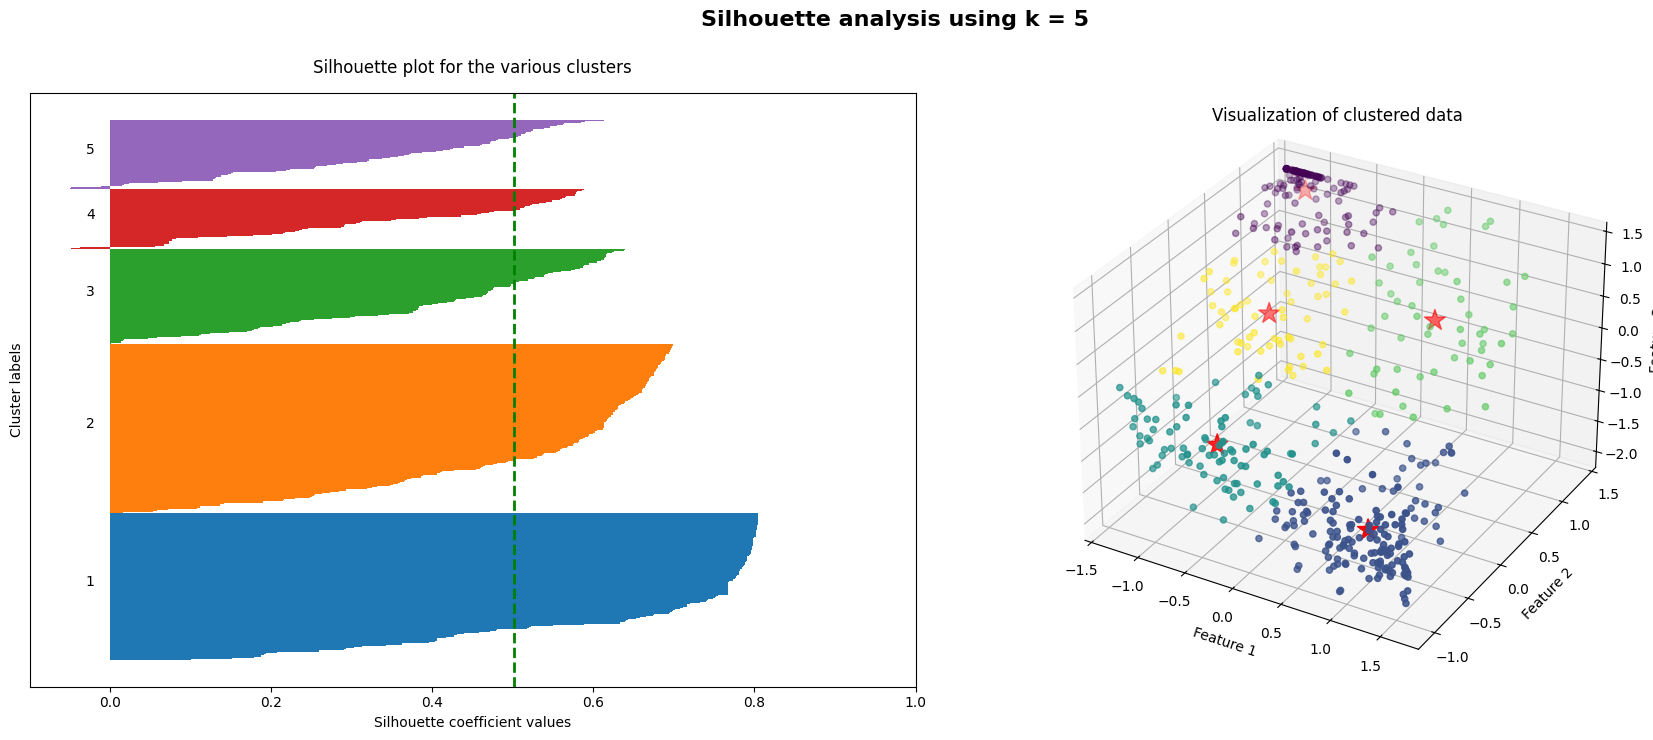

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

# Giả sử bạn đã chuẩn hóa dữ liệu và biến rfm_df_t có kích thước (n_samples, 3)
for i, k in enumerate([3,4,5]):
    fig = plt.figure(figsize=(18, 7))
    
    # Run the KMeans algorithm
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(rfm_df_t)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(rfm_df_t, labels)

    # Silhouette plot
    ax1 = fig.add_subplot(121)
    y_ticks = []
    y_lower, y_upper = 0, 0
    for cluster in np.unique(labels):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(cluster + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02)

    # Scatter plot of data colored with labels in 3D
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(rfm_df_t[:, 0], rfm_df_t[:, 1], rfm_df_t[:, 2], c=labels, cmap='viridis')
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', c='r', s=250)
    ax2.set_xlabel('Feature 1')  # Cập nhật nhãn nếu cần
    ax2.set_ylabel('Feature 2')  # Cập nhật nhãn nếu cần
    ax2.set_zlabel('Feature 3')  # Cập nhật nhãn nếu cần
    ax2.set_title('Visualization of clustered data', y=1.02)
    
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05)
    plt.show()

In [64]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(rfm_df_t)

KMeans(n_clusters=4, random_state=42)

In [65]:
# Gán nhãn cluster vào dataframe
rfm_df['Cluster'] = model.labels_ 

# Kiểm tra kích thước
print(len(rfm_df), len(model.labels_))

507 507


In [66]:
rfm_df.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency': 'mean',
        'Monetary': 'mean'
    }
)

,Recency,Frequency,Monetary
Cluster,,,
0,39.240741,59.895062,193230.559773
1,1085.628049,1.304878,2195.632575
2,175.051724,2.163793,10458.629899
3,691.769231,23.307692,50418.289120


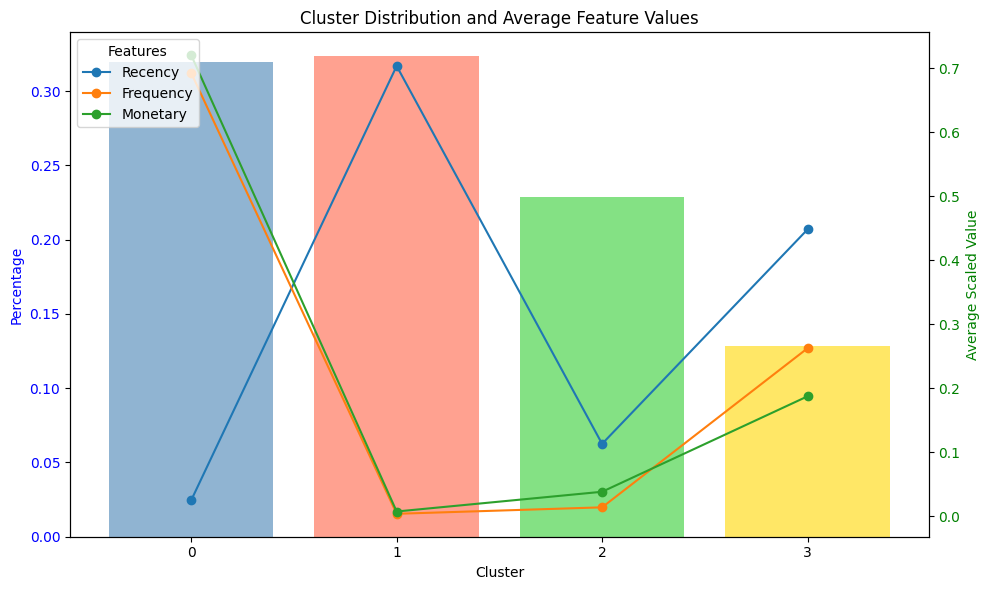

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Chọn các thuộc tính bạn muốn tính giá trị trung bình
features = ['Recency', 'Frequency', 'Monetary']

# Chuẩn hóa các thuộc tính
scaler = MinMaxScaler()
rfm_df[features] = scaler.fit_transform(rfm_df[features])
# Tính tỷ lệ phần trăm số lượng mẫu trong từng cụm
cluster_counts = rfm_df['Cluster'].value_counts(normalize=True)

# Tính giá trị trung bình của các thuộc tính theo từng cụm
mean_values = rfm_df.groupby('Cluster')[features].mean()

# Tạo biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart: phân phối các cụm
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']  # Màu sắc cho từng cụm
ax1.bar(cluster_counts.index, cluster_counts.values, color=colors, alpha=0.6, label='Cluster Distribution')
# Đặt tiêu đề và nhãn cho trục x, y
ax1.set_title('Cluster Distribution and Average Feature Values')
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Percentage', color='blue')
ax1.set_xticks(cluster_counts.index)  # Đảm bảo các nhãn trên trục X đúng
ax1.set_xticklabels(cluster_counts.index, rotation=0)
ax1.tick_params(axis='y', labelcolor='blue')
# Tạo trục y thứ hai để vẽ line chart
ax2 = ax1.twinx()
for feature in features:
    ax2.plot(mean_values.index, mean_values[feature], marker='o', label=feature)
# Đặt nhãn và màu sắc cho trục y thứ hai
ax2.set_ylabel('Average Scaled Value', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Thêm legend
ax2.legend(title='Features', loc='upper left')
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

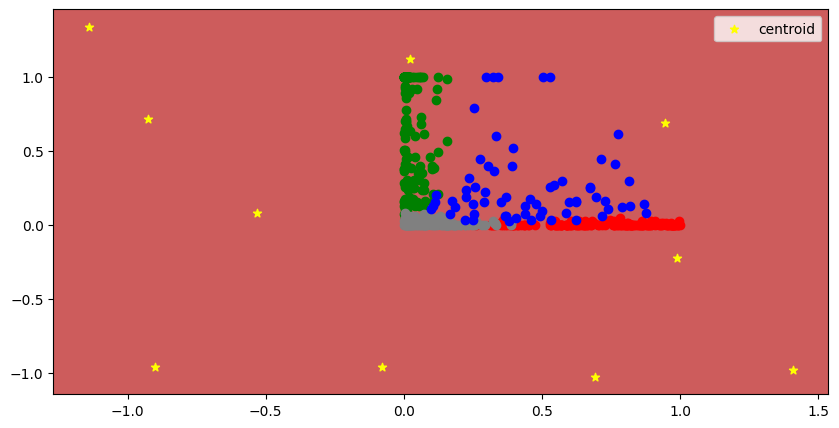

In [68]:
# grouping the data in accorandance with each cluster seperately
one = rfm_df[rfm_df["Cluster"]==0]
two = rfm_df[rfm_df["Cluster"]==1]
three = rfm_df[rfm_df["Cluster"]==2]
four = rfm_df[rfm_df["Cluster"]==3]

#Checking the quality of clustering in the data set
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_facecolor("#cd5c5c")
plt.scatter(one["Recency"],one["Frequency"],color='green')
plt.scatter(two["Recency"],two["Frequency"],color='red')
plt.scatter(three["Recency"],three["Frequency"],color='grey')
plt.scatter(four["Recency"],four["Frequency"],color='blue')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="yellow",marker="*",label="centroid")
plt.legend()
plt.show 

In [69]:
from sklearn.metrics import silhouette_score
print("Silhouette score :",silhouette_score(rfm_df, kmeans.labels_, metric='euclidean'))

Silhouette score : -0.1662114500305493


In [70]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster

In [71]:
columns = ['Recency', 'Frequency', 'Monetary']
df_HR = rfm_df[columns]

In [72]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_HR)
scaled_df_HR = pd.DataFrame(data_scaled, columns=df_HR.columns)
print(scaled_df_HR.head())

    Recency  Frequency  Monetary
0 -0.955901   0.402406  1.955395
1  0.480571  -0.311928 -0.468656
2 -0.867108  -0.032406 -0.099325
3  0.263522  -0.684624 -0.705312
4 -0.788181   0.371348  0.006405


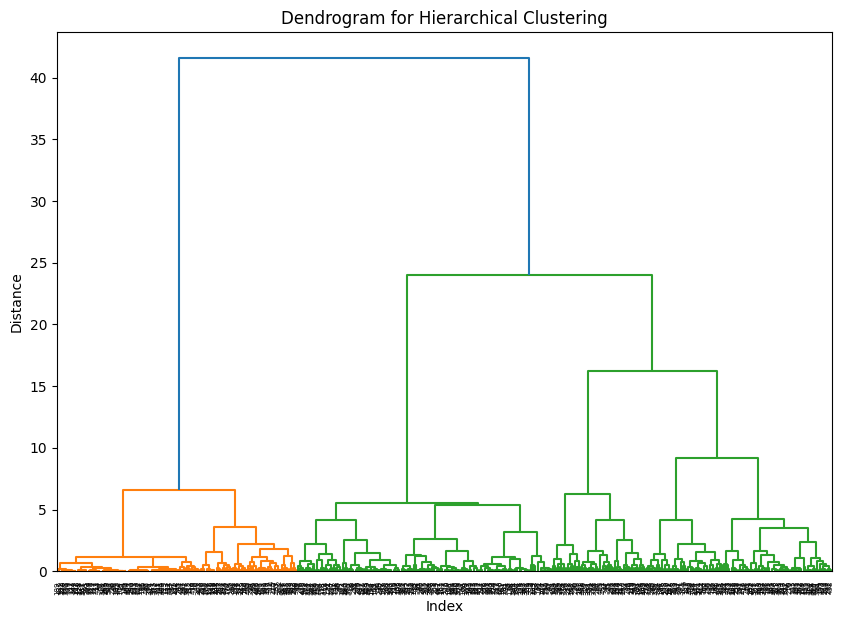

In [73]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Tính toán các liên kết phân cấp
Z = linkage(rfm_df_t, method='ward')

# Vẽ dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [74]:
model = AgglomerativeClustering(n_clusters=2, linkage='ward')
rfm_df['Cluster_Hierarchical'] = model.fit_predict(rfm_df_t)
print("Kết quả phân cụm:\n", rfm_df[['Cluster_Hierarchical']].value_counts())

Kết quả phân cụm:
 Cluster_Hierarchical
0                       350
1                       157
Name: count, dtype: int64


In [75]:
print(rfm_df.head())  # Kiểm tra các dòng đầu tiên trong DataFrame để đảm bảo dữ liệu đúng
print(rfm_df.shape)  # Kiểm tra số lượng cột và dòng trong DataFrame


   CustomerID   Recency  Frequency  Monetary  Cluster  Cluster_Hierarchical
0           0  0.004543   0.411765  1.000000        0                     1
1           1  0.476963   0.141176  0.089217        3                     0
2           2  0.033744   0.247059  0.227985        0                     1
3           3  0.405581   0.000000  0.000299        1                     0
4           4  0.059701   0.400000  0.267711        0                     1
(507, 6)


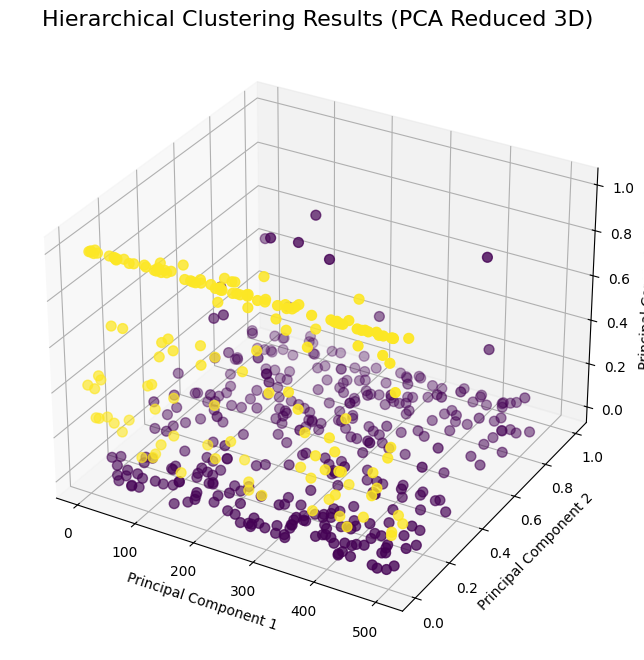

In [76]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Kiểm tra các cột bạn muốn vẽ
sc = ax.scatter(
    rfm_df.iloc[:, 0], rfm_df.iloc[:, 1], rfm_df.iloc[:, 2],  # Các cột cho trục X, Y, Z
    c=rfm_df['Cluster_Hierarchical'], cmap='viridis', s=50  # Dùng cột phân cụm làm màu
)

# Cài đặt tiêu đề và nhãn cho các trục
ax.set_title('Hierarchical Clustering Results (PCA Reduced 3D)', fontsize=16)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Hiển thị đồ thị
plt.show()


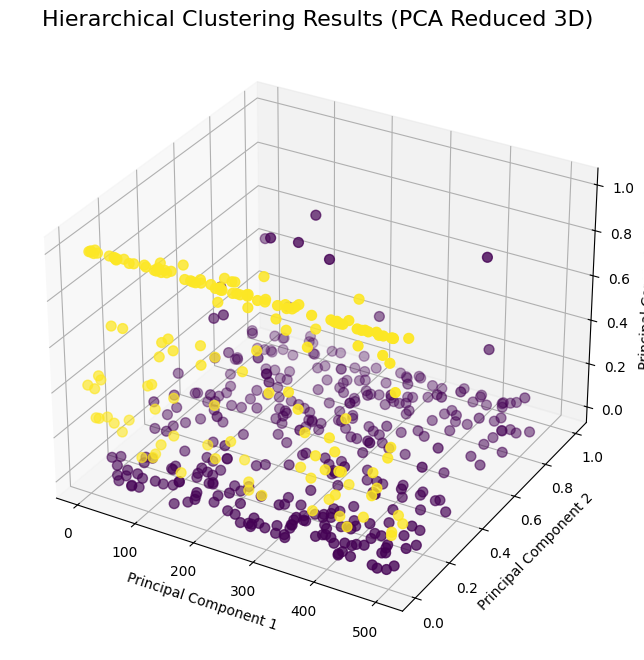

In [77]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(
    rfm_df.iloc[:, 0], rfm_df.iloc[:, 1], rfm_df.iloc[:, 2], 
    c=rfm_df['Cluster_Hierarchical'], cmap='viridis', s=50
)
ax.set_title('Hierarchical Clustering Results (PCA Reduced 3D)', fontsize=16)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()